##Name: Ameer Hamza
##Email: ameer4955@gamil.com

In [45]:
#import libraires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, sklearn

#surpressing warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = FutureWarning)

#importing dataset
full_data = pd.read_csv("USA_Housing.csv")

# shorting the name of column head
full_data = full_data.rename(columns= {"Avg. Area Income": "Income",
                                       "Avg. Area House Age": "House Age",
                                       "Avg. Area Number of Rooms": "Rooms",
                                       "Avg. Area Number of Bedrooms": "Bedrooms",
                                       "Area Population": "Population",})

#1. Perform EDA on the Dataset Which should include
##1.a. Visualization and explore the data using seaborn


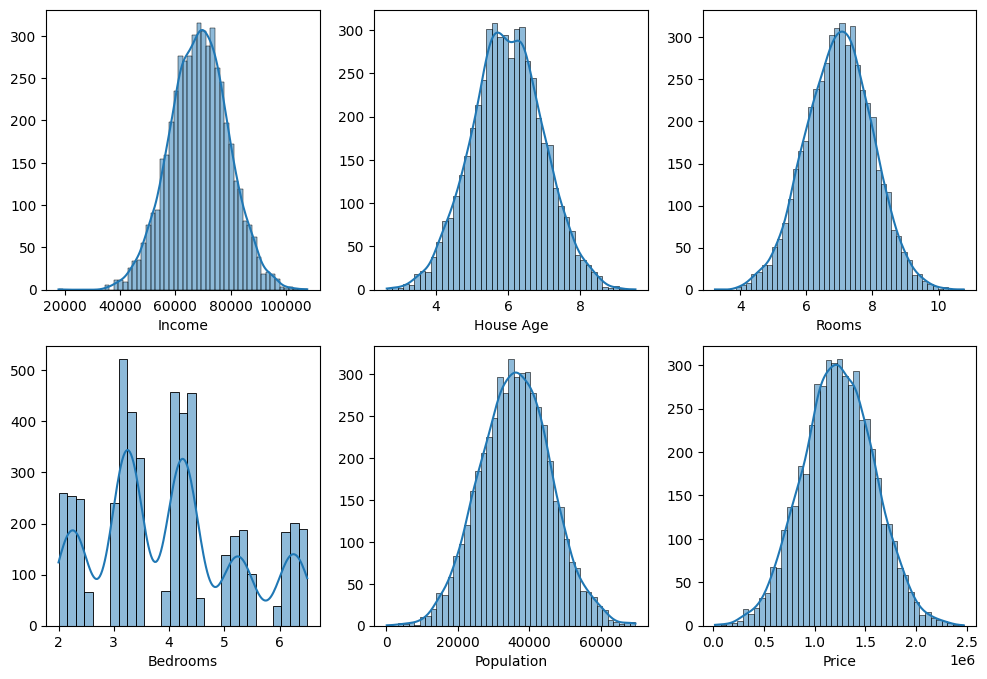


Note: 'Address' column is not shown in these graphs as it has nominal values.


In [46]:
fig = plt.figure(figsize=(12, 8))

for i in range(6):
    fig.add_subplot(2, 3, i+1)
    sns.histplot(full_data[full_data.columns[i]], kde= True)
    plt.ylabel("")
plt.show()
print("\nNote: 'Address' column is not shown in these graphs as it has nominal values.")

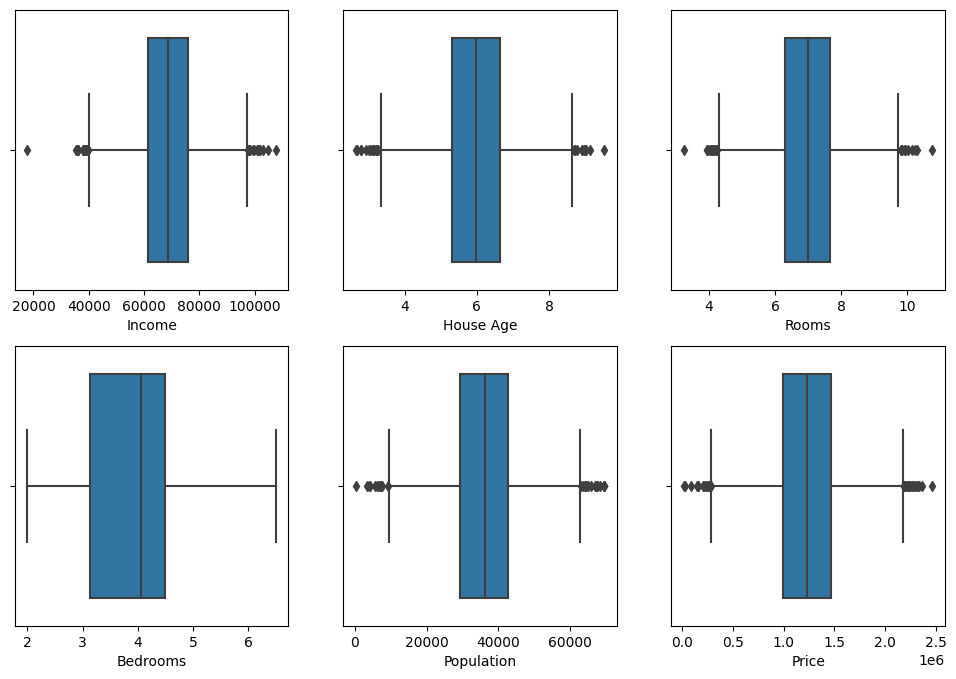


Note: 'Address' column is not shown in these graphs as it has nominal values.


In [47]:
fig = plt.figure(figsize=(12, 8))

for i in range(6):
    fig.add_subplot(2, 3, i+1)
    sns.boxplot(x = full_data[full_data.columns[i]])
    plt.ylabel("")
plt.show()
print("\nNote: 'Address' column is not shown in these graphs as it has nominal values.")

##1.a.i. Add your findings about the data under each graph in the code notebook
I have used histplot and box plot to plot data as these are the most used and esay to read graphs.
In histplot, we have the feature name on x axis and feature count on y axis.
As shown in plots, most of the features are either positive or negative skewed except number of bedrooms.


##1.b. Identify the data patterns if exist for single/multiple variables

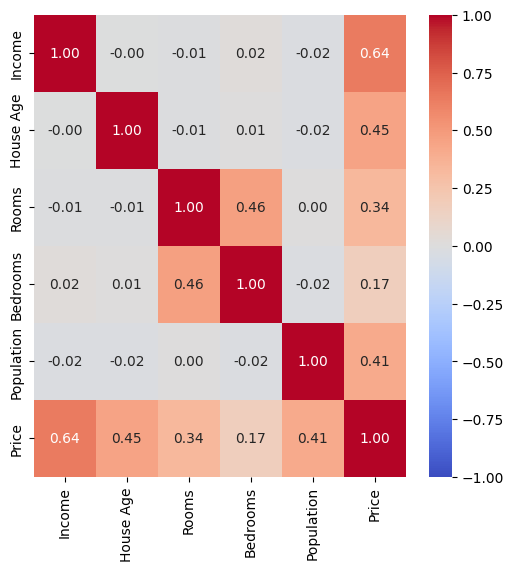

In [48]:
correl = full_data.corr()
plt.subplots(figsize=(6, 6))
sns.heatmap(correl, cmap = "coolwarm", annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

##1.b.i. Write your findings under the plots or code that identify the pattern
In above heatmap, we can see that there is blue box which indicates that all attributes has positive relation (directly proportonal) with each other. Only price has medium to strong relation with all numerical attributes. Correlatons except for price is equal to or less than ±0.02.

##1.c. Clean the dataset, remove the missing values as mentioned in the Lectures 15

In [49]:
print("Data representation before cleaning\n\n")

full_data.info()

Data representation before cleaning


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Income      5000 non-null   float64
 1   House Age   5000 non-null   float64
 2   Rooms       5000 non-null   float64
 3   Bedrooms    5000 non-null   float64
 4   Population  5000 non-null   float64
 5   Price       5000 non-null   float64
 6   Address     5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [50]:
# remooving address column
full_data = full_data.drop(["Address"], axis= 1)

# dropping empty values
full_data.dropna(inplace= True)

# removing duplicate from dataset
full_data = full_data.drop_duplicates()

print("Data representation after cleaning\n\n")
full_data.info()

Data representation after cleaning


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Income      5000 non-null   float64
 1   House Age   5000 non-null   float64
 2   Rooms       5000 non-null   float64
 3   Bedrooms    5000 non-null   float64
 4   Population  5000 non-null   float64
 5   Price       5000 non-null   float64
dtypes: float64(6)
memory usage: 273.4 KB


##1.c.i. Explain your approach in the Collab notebook text cell
First we removed address column as it has nominal values. If we convert it to catogorical data then it will create 68 column. I will apply some other technique after guidance of Sir Haris later in August.
After removing address column, we removed missing values rows and duplicate rows(This dataset don't have any missing or duplicate rows but we still used it as a common pratice to pre-process our data).

##1.d. Select the target variable and clearly mention the reason for selecting it.
I selected price feature as it has more benificiary value as compare to any other feature. It will give an insight were to invest.

##1.e. Transform the Dataset
##1.e.i. Transform the whole dataset (Features , Target Variable)

In [51]:
# each column except Price is our feature
x = full_data.drop(["Price"], axis= 1)

# Price is assigned to y as it is our target variable
y = full_data["Price"]

In [52]:
print("\nFeatures\n")
x.head()


Features



,Income,House Age,Rooms,Bedrooms,Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


##1.f. Split the Dataset into train and test set

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .10, random_state= 101)

#2. Use the Scikit Learn Library to fit the Regression Models
##2.a. Use the different regression models
In this portion, I will measure MSE for different types of regression and will use best model on scaled data.

##2.a.i. Linear regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

lin_y_pred = lin_reg.predict(x_test)

lin_mse = mean_squared_error(y_test, lin_y_pred)

print("MSE of Linear Regression Model:", lin_mse)

MSE of Linear Regression Model: 9839952411.804739


##2.a.ii. Decision tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

dt_y_pred = dt_regressor.predict(x_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)

print("MSE of Decision Tree Regression Model:", dt_mse)

MSE of Decision Tree Regression Model: 31117616754.499256


##2.a.iii. Random forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)

rf_y_pred = rf_regressor.predict(x_test)

rf_mse = mean_squared_error(y_test, rf_y_pred)

print("MSE of Random Forest Regression Model:", rf_mse)

MSE of Random Forest Regression Model: 14405919714.799833


##2.a.iv. Gradient boosting Regressor

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

gb_y_pred = gb_regressor.predict(x_test)

gb_mse = mean_squared_error(y_test, gb_y_pred)

print("MSE of Gradient Boosting Model:", gb_mse)

MSE of Gradient Boosting Model: 12036105210.642529


##2.b. You have to report the MSE result with the following combinations
##2.b.i. Without feature scaling

In [58]:
# we have already calculated MSE in prevous section.
print("MSE of Linear Regression Model with no scaling:", lin_mse)
print("MSE of Decision Tree Regression Model with no scaling:", dt_mse)
print("MSE of Random Forest Regression Model with no scaling:", rf_mse)
print("MSE of Gradient Boosting Model with no scaling:", gb_mse)

MSE of Linear Regression Model with no scaling: 9839952411.804739
MSE of Decision Tree Regression Model with no scaling: 31117616754.499256
MSE of Random Forest Regression Model with no scaling: 14405919714.799833
MSE of Gradient Boosting Model with no scaling: 12036105210.642529


##2.b.ii. With only feature scaling (without target variable)

In [59]:
# x transformation
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x)
x_transform = scaler.fit_transform(x)



#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size= .10, random_state= 101)



#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

lin_y_pred = lin_reg.predict(x_test)

xt_lin_mse = mean_squared_error(y_test, lin_y_pred)

print("MSE of Linear Regression Model with only feature scaling:", xt_lin_mse)



#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

dt_y_pred = dt_regressor.predict(x_test)

xt_dt_mse = mean_squared_error(y_test, dt_y_pred)

print("MSE of Decision Tree Regression Model with only feature scaling:", xt_dt_mse)



#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)

rf_y_pred = rf_regressor.predict(x_test)

xt_rf_mse = mean_squared_error(y_test, rf_y_pred)

print("MSE of Random Forest Regression Model with only feature scaling:", xt_rf_mse)



from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

gb_y_pred = gb_regressor.predict(x_test)

xt_gb_mse = mean_squared_error(y_test, gb_y_pred)

print("MSE of Gradient Boosting Model with only feature scaling:", xt_gb_mse)

MSE of Linear Regression Model with only feature scaling: 9839952411.801708
MSE of Decision Tree Regression Model with only feature scaling: 31570426931.019836
MSE of Random Forest Regression Model with only feature scaling: 14206625880.528368
MSE of Gradient Boosting Model with only feature scaling: 12031264077.00975


##2.b.iii. With feature and target variable scaling

In [60]:
# x transformation
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x)
x_transform = scaler.fit_transform(x)


# # y transformation
# label_encoder = preprocessing.LabelEncoder()
# y_transform = label_encoder.fit_transform(y.astype('float32'))
y = full_data["Price"].values
y_reshape = y.reshape(-1, 1)
y_scaler = preprocessing.StandardScaler().fit(y_reshape)
y_transform = y_scaler.transform(y_reshape)



#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_transform, y_transform, test_size= .10, random_state= 101)



#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

lin_y_pred = lin_reg.predict(x_test)

xyt_lin_mse = mean_squared_error(y_test, lin_y_pred)

print("MSE of Linear Regression Model with feature and target variable scaling:", xyt_lin_mse)



#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

dt_y_pred = dt_regressor.predict(x_test)

xyt_dt_mse = mean_squared_error(y_test, dt_y_pred)

print("MSE of Decision Tree Regression Model with feature and target variable scaling:", xyt_dt_mse)



#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)

rf_y_pred = rf_regressor.predict(x_test)

xyt_rf_mse = mean_squared_error(y_test, rf_y_pred)

print("MSE of Random Forest Regression Model with feature and target variable scaling:", xyt_rf_mse)



from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

gb_y_pred = gb_regressor.predict(x_test)

xyt_gb_mse = mean_squared_error(y_test, gb_y_pred)

print("MSE of Gradient Boosting Model with feature and target variable scaling:", xyt_gb_mse)

MSE of Linear Regression Model with feature and target variable scaling: 0.07892981267498214
MSE of Decision Tree Regression Model with feature and target variable scaling: 0.24949394629171967
MSE of Random Forest Regression Model with feature and target variable scaling: 0.11405503444511317
MSE of Gradient Boosting Model with feature and target variable scaling: 0.09666813782574764


##2.c. Display the ranking of different models according to their MSE value

In [61]:
model_scores = {
    "MSE of Linear Regression Model with no scaling:": lin_mse,
    "MSE of Decision Tree Regression Model with no scaling:": dt_mse,
    "MSE of Random Forest Regression Model with no scaling:": rf_mse,
    "MSE of Gradient Boosting Model with no scaling:": gb_mse,
    "MSE of Linear Regression Model with only feature scaling:": xt_lin_mse,
    "MSE of Decision Tree Regression Model with only feature scaling:": xt_dt_mse,
    "MSE of Random Forest Regression Model with only feature scaling:": xt_rf_mse,
    "MSE of Gradient Boosting Model with only feature scaling:": xt_gb_mse,
    "MSE of Linear Regression Model with feature and target variable scaling:": xyt_lin_mse,
    "MSE of Decision Tree Regression Model with feature and target variable scaling:": xyt_dt_mse,
    "MSE of Random Forest Regression Model with feature and target variable scaling:": xyt_rf_mse,
    "MSE of Gradient Boosting Model with feature and target variable scaling:": xyt_gb_mse
}


sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (lower values are better):
1. MSE of Linear Regression Model with feature and target variable scaling:: 0.07892981267498214
2. MSE of Gradient Boosting Model with feature and target variable scaling:: 0.09666813782574764
3. MSE of Random Forest Regression Model with feature and target variable scaling:: 0.11405503444511317
4. MSE of Decision Tree Regression Model with feature and target variable scaling:: 0.24949394629171967
5. MSE of Linear Regression Model with only feature scaling:: 9839952411.801708
6. MSE of Linear Regression Model with no scaling:: 9839952411.804739
7. MSE of Gradient Boosting Model with only feature scaling:: 12031264077.00975
8. MSE of Gradient Boosting Model with no scaling:: 12036105210.642529
9. MSE of Random Forest Regression Model with only feature scaling:: 14206625880.528368
10. MSE of Random Forest Regression Model with no scaling:: 14405919714.799833
11. MSE of Decision Tree Regression Model with no scaling:: 31117616754.499256
12. MSE o